In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-students-data/Kmeans_assignment_data.csv


In [35]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

link for data: https://www.kaggle.com/datasets/tarekmuhammed/university-students-data/data

In [16]:
df = pd.read_csv('/kaggle/input/university-students-data/Kmeans_assignment_data.csv')

In [17]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [8]:
df.dropna()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [13]:
df.duplicated().sum()

0

In [18]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})


In [19]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<Axes: >

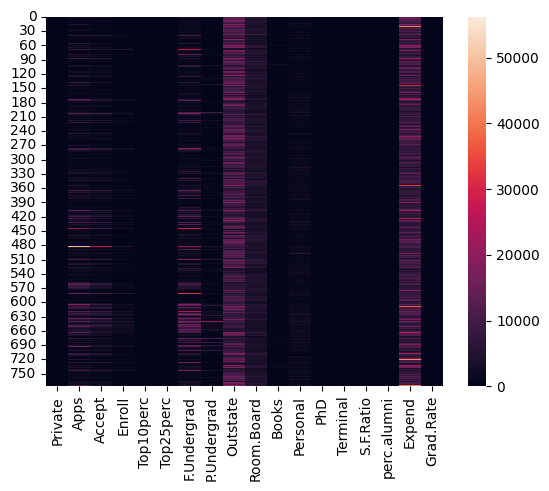

In [26]:
df1 = df.drop('Unnamed: 0', axis = 1)
sns.heatmap(df1)

(array([ 3.,  1.,  1.,  0.,  1.,  2.,  2.,  4.,  8.,  6.,  7., 14., 25.,
        18., 24., 35., 30., 42., 56., 43., 54., 67., 56., 53., 65., 61.,
        46., 34., 15.,  4.]),
 array([  8.        ,  11.16666667,  14.33333333,  17.5       ,
         20.66666667,  23.83333333,  27.        ,  30.16666667,
         33.33333333,  36.5       ,  39.66666667,  42.83333333,
         46.        ,  49.16666667,  52.33333333,  55.5       ,
         58.66666667,  61.83333333,  65.        ,  68.16666667,
         71.33333333,  74.5       ,  77.66666667,  80.83333333,
         84.        ,  87.16666667,  90.33333333,  93.5       ,
         96.66666667,  99.83333333, 103.        ]),
 <BarContainer object of 30 artists>)

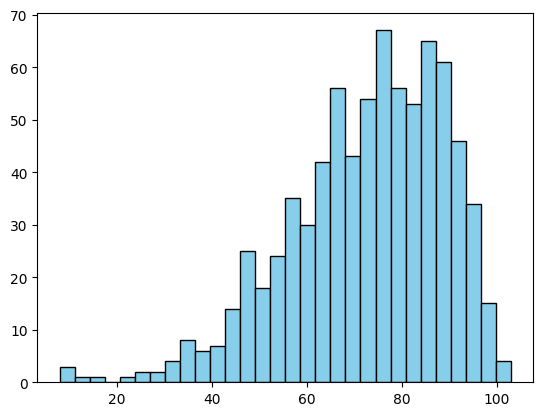

In [30]:
import matplotlib.pyplot as plt
plt.hist(df['PhD'], bins=30, color='skyblue', edgecolor='black')


Text(0.5, 1.0, 'Relation between graduation rating and the costing of rooms and boards : ')

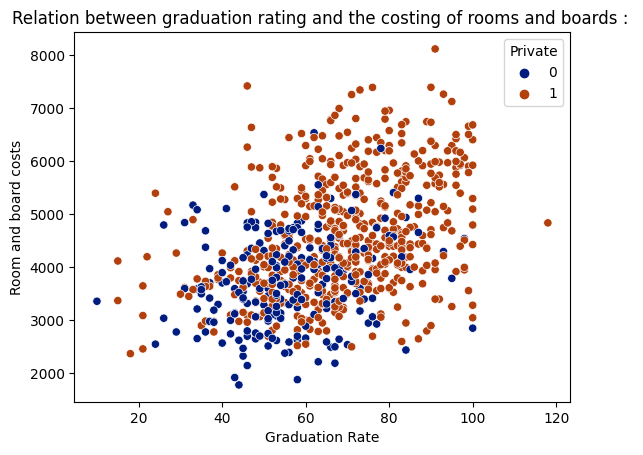

In [32]:
sns.scatterplot(x=df["Grad.Rate"],y=df["Room.Board"],hue=df["Private"],palette='dark')
plt.xlabel("Graduation Rate")
plt.ylabel("Room and board costs")
plt .title("Relation between graduation rating and the costing of rooms and boards : ")

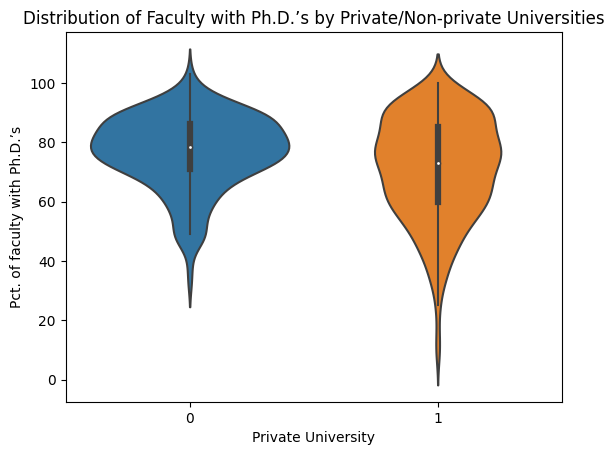

In [33]:
sns.violinplot(x='Private', y='PhD', data=df)
plt.xlabel('Private University')
plt.ylabel('Pct. of faculty with Ph.D.’s')
plt.title('Distribution of Faculty with Ph.D.’s by Private/Non-private Universities')
plt.show()

In [38]:
df = df.drop('Unnamed: 0', axis = 1)
ScaledData=StandardScaler().fit_transform(df)

In [40]:
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [41]:
pca=PCA()
pca.fit(ScaledData)

PCA()

In [42]:
scores = []
k_range = range(1,10)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(ScaledData)
    scores.append(kmeans_model.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [43]:
scores

[13985.999999999996,
 11114.277674353798,
 8739.119064548498,
 7790.871194623685,
 7039.346795274192,
 6698.961995574383,
 6426.846232159895,
 6172.437555090398,
 5930.828895900247]

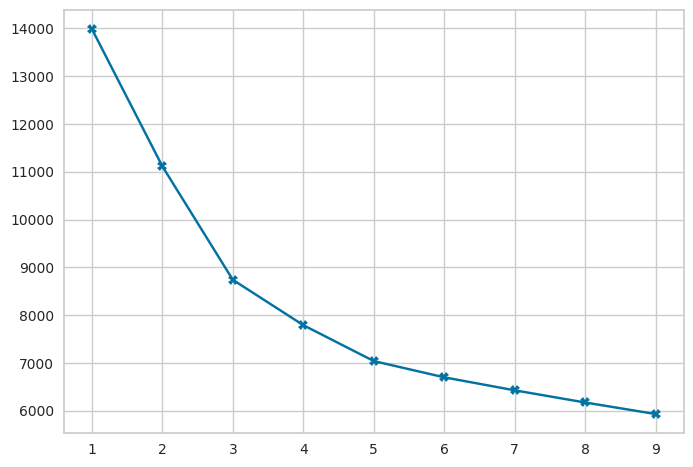

In [44]:
plt.plot(k_range, scores, marker = 'X')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

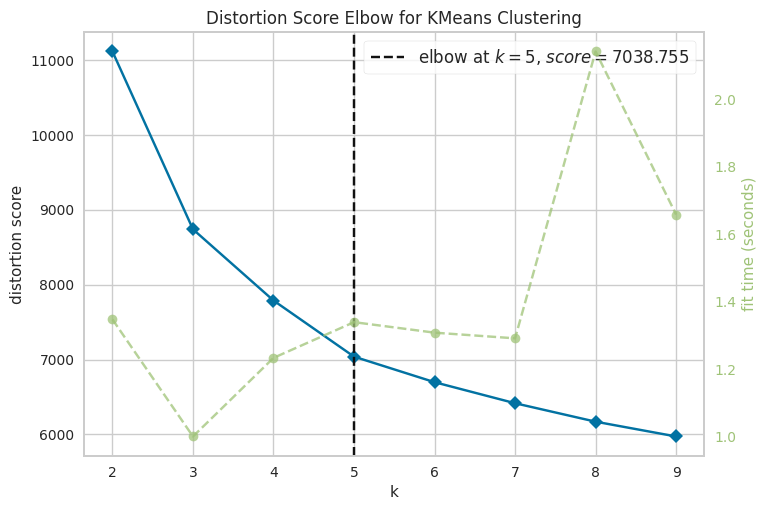

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
elbow_method = KElbowVisualizer(KMeans(), k = 9)
elbow_method.fit(ScaledData)
elbow_method.show()

In [58]:
kmeans_model_1 = KMeans(n_clusters = 2)
kmeans_model_1.fit(ScaledData)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [59]:
scores_1 =[]
scores_1.append(kmeans_model_1.inertia_)

In [60]:
scores_1

[11114.277674353798]

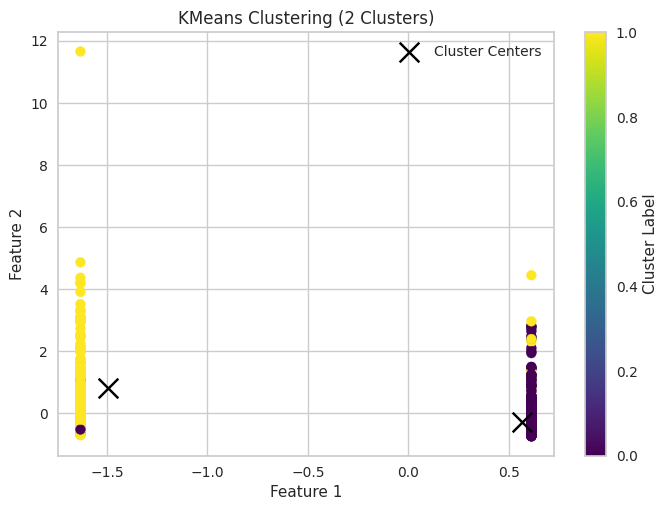

In [61]:
import matplotlib.pyplot as plt

# Assuming you already have kmeans_model_1 and ScaledData
predicted_labels = kmeans_model_1.predict(ScaledData)

# Create a scatter plot
plt.scatter(ScaledData[:, 0], ScaledData[:, 1], c=predicted_labels, cmap='viridis', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering (2 Clusters)')
plt.colorbar(label='Cluster Label')

# Optionally, plot the cluster centers
cluster_centers = kmeans_model_1.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=200, label='Cluster Centers')
plt.legend()

plt.show()

